In [1]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("D:\\burtm\\Visual_studio_code\\PD_related_projects"))

d:\burtm\Visual_studio_code\conda_environments\GeneralPurposeML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
N_max=282
patches=True
input_filename='icdar_train_df_patches_20250515_164130.csv'
huggingface=False
pooling=False # if true in transformer mdoels use pooling, if false only the cls token
custom_transform=True

In [56]:
selected_model = 'resnet50'

transform = u_transforms.get_transform(selected_model, use_patches=True, custom=custom_transform)
model = model_utils.get_model(name=selected_model, mode='truncated', pretrained=True, truncation='remove head')

In [57]:
# Define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device is: ",device)
model = model.to(device)

Device is:  cuda


In [58]:
source_path="D:\\burtm\\Visual_studio_code\\PD_related_projects"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{input_filename}")

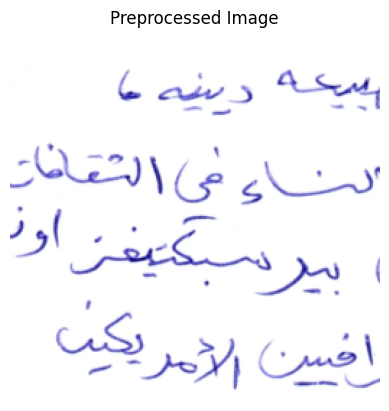

In [59]:
visualization.show_preprocessed_from_csv(train_df,transform,hugging=huggingface,index=0,patches=patches)

In [60]:
i=0
output=compute_output(model, device, transform, train_df.iloc[i], huggingface, patches)

In [61]:
print("Output shape: ", output.shape)

Output shape:  torch.Size([1, 2048])


In [62]:
model.eval()

# Initialize a dictionary to store new feature columns
new_features = {}

for index,t in train_df.iterrows():
    if huggingface:
        if pooling:
            print("Pooling is not implemented yet")
            break
        else:
            output = compute_output(model, device, transform, t, huggingface, patches)[:,0,:]
    else:
        output = compute_output(model, device, transform, t, huggingface, patches)
    for i, value in enumerate(output.squeeze().tolist()):
        column_name = f"f{i+1}"
        if column_name not in new_features:
            new_features[column_name] = []
        new_features[column_name].append(value)
    if index % 100 == 0:
        print(f"Processed {index} images, out of {len(train_df)}")

    
# Add the new features to the DataFrame in one operation
new_features_df = pd.DataFrame(new_features)
train_df = pd.concat([train_df.reset_index(drop=True), new_features_df], axis=1)

Processed 0 images, out of 5640
Processed 100 images, out of 5640
Processed 200 images, out of 5640
Processed 300 images, out of 5640
Processed 400 images, out of 5640
Processed 500 images, out of 5640
Processed 600 images, out of 5640
Processed 700 images, out of 5640
Processed 800 images, out of 5640
Processed 900 images, out of 5640
Processed 1000 images, out of 5640
Processed 1100 images, out of 5640
Processed 1200 images, out of 5640
Processed 1300 images, out of 5640
Processed 1400 images, out of 5640
Processed 1500 images, out of 5640
Processed 1600 images, out of 5640
Processed 1700 images, out of 5640
Processed 1800 images, out of 5640
Processed 1900 images, out of 5640
Processed 2000 images, out of 5640
Processed 2100 images, out of 5640
Processed 2200 images, out of 5640
Processed 2300 images, out of 5640
Processed 2400 images, out of 5640
Processed 2500 images, out of 5640
Processed 2600 images, out of 5640
Processed 2700 images, out of 5640
Processed 2800 images, out of 56

In [63]:
train_df.head()

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,...,f2039,f2040,f2041,f2042,f2043,f2044,f2045,f2046,f2047,f2048
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,0,493,493,...,0.320135,0.005993,0.019706,0.037820,0.038517,0.003049,0.000000,0.043790,0.006455,0.050629
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,493,493,986,...,0.228396,0.021903,0.031332,0.003770,0.055954,0.001983,0.010461,0.005567,0.000000,0.048517
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,2,1479,493,1972,...,0.238214,0.012033,0.000000,0.018488,0.009293,0.004099,0.010731,0.027196,0.000000,0.029188
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,3,986,493,1479,...,0.192557,0.005482,0.006623,0.012539,0.022478,0.018802,0.037155,0.095726,0.000000,0.017398
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,4,1972,493,2465,...,0.180378,0.000751,0.000000,0.024398,0.015985,0.001557,0.003721,0.028408,0.001429,0.021523


In [ ]:
'''from utils.dataframes import CustomImageDataset, CustomPatchDataset
from torch.utils.data import Dataset,DataLoader, random_split
source_path="D:\\burtm\\Visual_studio_code\\PD_related_projects"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{input_filename}")
model.eval()
dataset = CustomPatchDataset(train_df[train_df['writer']<=N_max] ,
                                        label_column='male', transform=transform, huggingface=huggingface)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
new_features = {}

for idx, batch in enumerate(dataloader):
    patch = batch['image'].to(device)
    output = model(pixel_values=patch)
    cls_token_output = output.last_hidden_state[:, 0, :]  # Extract the CLS token
    for i, value in enumerate(cls_token_output.squeeze().tolist()):
        column_name = f"f{i+1}"
        if column_name not in new_features:
            new_features[column_name] = []
        new_features[column_name].append(value)
    if idx % 100 == 0:
        print(f"Processed {idx * batch_size} images, out of {len(dataset)}")

# Convert the dictionary to a DataFrame
new_features_df = pd.DataFrame(new_features)'''

Processed 0 images, out of 5640



KeyboardInterrupt



In [64]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join(source_path, "outputs", "preprocessed_data")
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

output_file = os.path.join(output_dir, f"icdar_EXTRACTED_train_df_{selected_model}_{timestamp}.csv")
train_df.to_csv(output_file, index=False)

print(f"Dataframe saved to {output_file}")

Dataframe saved to D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_EXTRACTED_train_df_resnet50_20250516_163737.csv


In [65]:
# Example usage:
LOG_FILE = output_dir+"\\file_metadata_log.json"
print(f"Log file path: {LOG_FILE}")
print(f"Output file path: {output_file}")
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        #"seed": seed,
        "source_file": input_filename,
        "model": selected_model,
        "pooling": pooling,
        "custom transform": custom_transform,
        "description": '''I am performing inference with resnet50 on the patches dataset and saving the output features as columns of the dataframe
        the columns are named f1, f2, .., f2048. I apply the standard transform required by the model''' 
    }
)

Log file path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\file_metadata_log.json
Output file path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_EXTRACTED_train_df_resnet50_20250516_163737.csv
Updated log for icdar_EXTRACTED_train_df_resnet50_20250516_163737.csv


In [66]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_EXTRACTED_train_df_resnet50_20250516_163737.csv:
full_path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_EXTRACTED_train_df_resnet50_20250516_163737.csv
size_bytes: 220215329
created: 2025-05-16T16:37:38.026354
modified: 2025-05-16T16:38:11.704283
accessed: 2025-05-16T16:38:11.704283
source_file: icdar_train_df_patches_20250515_164130.csv
model: resnet50
pooling: False
custom transform: True
description: I am performing inference with resnet50 on the patches dataset and saving the output features as columns of the dataframe
        the columns are named f1, f2, .., f2048. I apply the standard transform required by the model


In [15]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path=source_path+f"\\outputs\\preprocessed_data\\icdar_EXTRACTED_trocr_stage_1_10blocks_{timestamp}.csv"
train_df.to_csv(file_path, index=False)
print(f"File saved: {file_path}")

File saved: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_EXTRACTED_trocr_stage_1_10blocks_20250509_153553.csv


# easy access

In [53]:
def reload_modules():
    import importlib
    import utils.data_loading as data_loading
    import utils.visualization as visualization
    import utils.dataframes as dataframes
    import utils.utils_transforms as u_transforms
    import utils.training_utils as training_utils
    import utils.model_utils as model_utils
    import utils.file_IO as file_IO
    
    importlib.reload(file_IO)
    importlib.reload(data_loading)
    importlib.reload(visualization)
    importlib.reload(dataframes)
    importlib.reload(u_transforms)
    importlib.reload(model_utils)
    importlib.reload(training_utils)

    return data_loading, visualization, dataframes, u_transforms, training_utils, model_utils, file_IO
data_loading, visualization, dataframes, u_transforms, training_utils, model_utils, file_IO = reload_modules()

In [54]:
def compute_output(model, device, transform, t, huggingface, patches):
    image_file = t['file_name']
    image = Image.open(image_file).convert("RGB")
    if patches:
        x1 = t['x']
        y1 = t['y']
        x2 = t['x2']
        y2 = t['y2']
        patch = image.crop((x1, y1, x2, y2))
    else:
        patch = image.copy()
    if huggingface:
        # the transform is actually an huggingface processor in this case
        inputs = transform(images=patch, return_tensors="pt")
        # Remove batch dimension from inputs
        patch = inputs['pixel_values'].squeeze()
    else:
        patch = transform(patch)
    patch = patch.to(device)
    output = model(patch.unsqueeze(0))
    return output

In [55]:
def show_image(transform, t, huggingface, patches):
    image_file = t['file_name']
    image = Image.open(image_file).convert("RGB")
    if patches:
        x1 = t['x']
        y1 = t['y']
        x2 = t['x2']
        y2 = t['y2']
        patch = image.crop((x1, y1, x2, y2))
    else:
        patch = image.copy()

    # Show original image/patch
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(patch)
    plt.title("Original")
    plt.axis('off')

    if huggingface:
        inputs = transform(images=patch, return_tensors="pt")
        transformed_patch = inputs['pixel_values'].squeeze()
        # Convert tensor to numpy for visualization
    else:
        transformed_patch = transform(patch)
    
    img_np = transformed_patch.permute(1, 2, 0).cpu().numpy()
    # Normalize if needed
    img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())

    plt.subplot(1, 2, 2)
    plt.imshow(img_np)
    plt.title("Transformed")
    plt.axis('off')
    plt.show()